In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
%matplotlib inline

# Hispanic/Latinx Population Displacement in Brooklyn, 2010-2020

### Load tract shapefile: "2020 Census Tracts (Clipped to Shoreline)"

Source: https://www1.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page

In [2]:
neighborhoods = gpd.read_file('C:/Users/mcarp/Downloads/nynta2020_21c/nynta2020_21c')
tracts = gpd.read_file('C:/Users/mcarp/Downloads/nyct2020_21c/nyct2020_21c')
tracts.head(1)

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,geometry
0,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048938,1.844421e+06,"MULTIPOLYGON (((972081.788 190733.467, 972184...."


### Load tract-level demographic data: DCP 2010, 2020 Census NYC Demographics 

Source: 
https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww1.nyc.gov%2Fassets%2Fplanning%2Fdownload%2Foffice%2Fplanning-level%2Fnyc-population%2Fcensus2020%2Fnyc_decennialcensusdata_2020_2010.xlsx%3Fr%3D5&wdOrigin=BROWSELINK

In [3]:
tract_data = pd.read_csv('C:/Users/mcarp/OneDrive/Documents/Brooklyn Pop Changes 2010 to 2020.csv')
df_tract = pd.DataFrame(tract_data)
pd.set_option('display.max_columns', None)
df_tract.head(1)

,GeoID,BCT2020,Pop_Ch,Pop_PCh,HHPop_Ch,HHPop_PCh,GQ_Ch,GQ_PCh,InstGQ_Ch,InstGQ_PCh,AvHHSz_Ch,AvHHSz_PCh,PopU18_Ch,PopU18_PCh,Hsp_Ch,Hsp_PCh,WNH_Ch,WNH_PCh,BNH_Ch,BNH_PCh,ANH_Ch,ANH_PCh,ONH_Ch,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh
0,36047000100,3000100,278.0,6.4,701.0,17.9,-423.0,-99.8,0.0,NaN,0.1,8.0,222.0,42.5,65.0,18.7,14.0,0.4,-113.0,-27.7,124.0,38.3,4.0,13.8,184.0,287.5,315.0,13.4,202.0,9.1,113.0,93.4


### Create Brooklyn tract GeoDataFrame with population demographic data

In [4]:
df_tract['BoroCT2020'] = df_tract['BCT2020']
df_tract.shape

(805, 33)

In [5]:
tractsBk = tracts[tracts['BoroName']=='Brooklyn']
tractsBk.shape

(804, 14)

In [6]:
crs = {'init': 'epsg:4326'}
geometry_tracts = tractsBk['geometry']

In [7]:
geo_tracts = gpd.GeoDataFrame(tracts, crs=crs, geometry=geometry_tracts)
geo_tracts['BoroCT2020'] = geo_tracts['BoroCT2020'].astype('int64')
geo_bk = geo_tracts.merge(df_tract, on='BoroCT2020')

C:\Users\mcarp\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\mcarp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  """Entry point for launching an IPython kernel.


## Changes in Hispanic/Latinx tract populations from 2010 to 2020

Text(0.5, 1.0, 'Hispanic/Latinx Population Changes in Brooklyn Tracts')

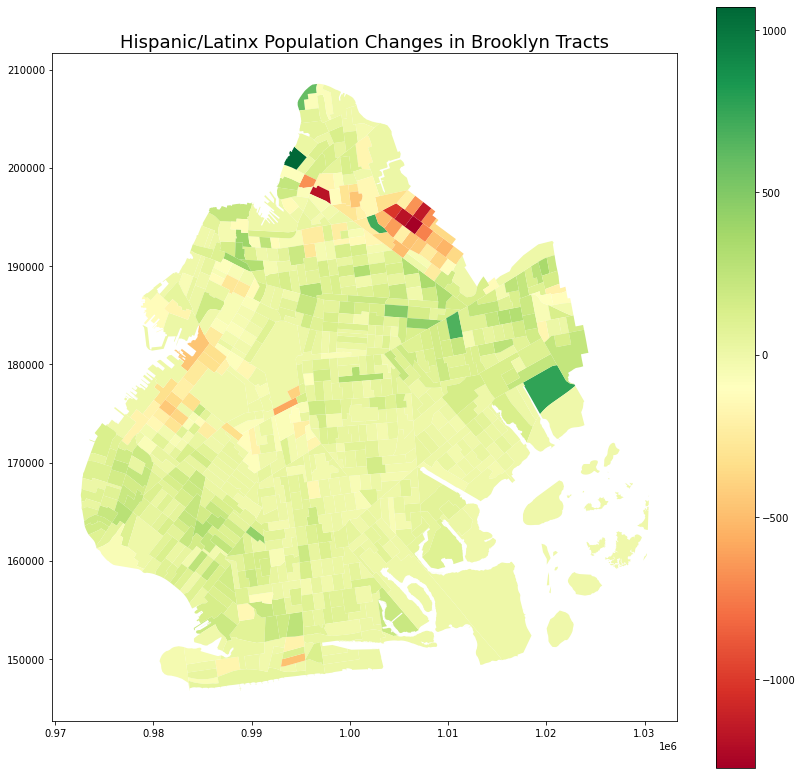

In [8]:
geo_bk.plot(column='Hsp_Ch', figsize=(14,14), cmap='RdYlGn', legend=True)
plt.title('Hispanic/Latinx Population Changes in Brooklyn Tracts', fontsize=18)

### Note: All of the most significant decreases occur in Bushwick and Williamsburg. Let's zoom in on these neighborhoods:

In [9]:
tractsBWest = tractsBk[tractsBk['NTAName']=='Bushwick (West)']
tractsBEast = tractsBk[tractsBk['NTAName']=='Bushwick (East)']
tractsWill = tractsBk[tractsBk['NTAName']=='Williamsburg']
tractsWillE = tractsBk[tractsBk['NTAName']=='East Williamsburg']
tractsWillS = tractsBk[tractsBk['NTAName']=='South Williamsburg']
tractsBW = pd.concat([tractsBWest, tractsBEast, tractsWill, tractsWillE, tractsWillS])
tractsBW.shape

(68, 14)

In [10]:
geo_tractsBW = gpd.GeoDataFrame(tractsBW, crs=crs, geometry=geometry_tracts)
geo_tractsBW['BoroCT2020'] = geo_tractsBW['BoroCT2020'].astype('int64')
geo_bw = geo_tractsBW.merge(df_tract, on='BoroCT2020')

C:\Users\mcarp\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\mcarp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  """Entry point for launching an IPython kernel.


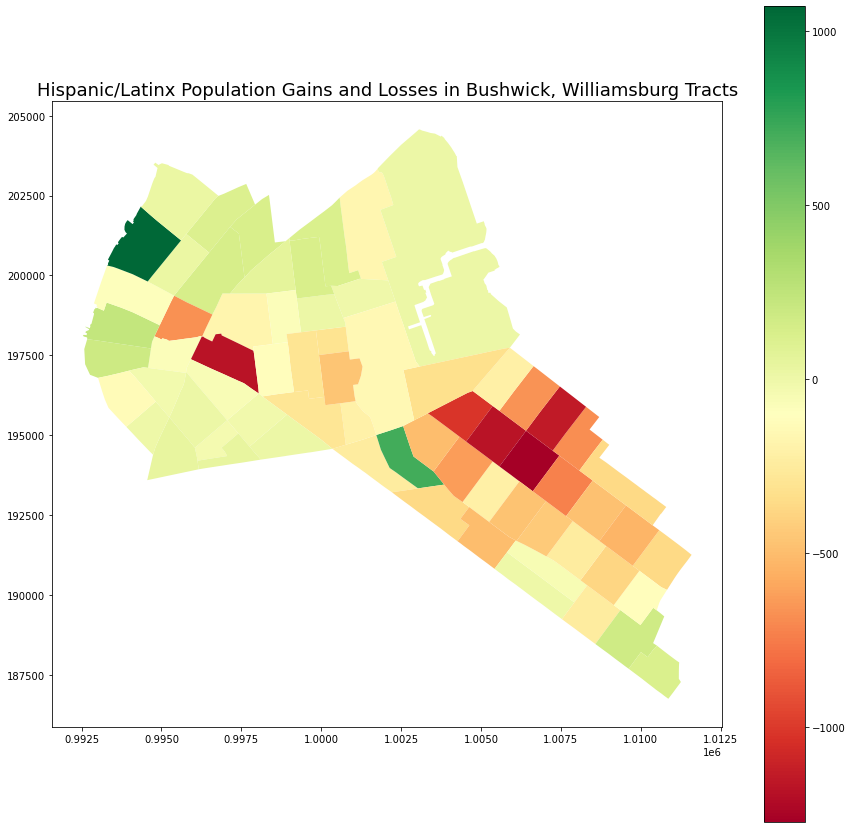

In [11]:
geo_bw.plot(column='Hsp_Ch', figsize=(15,15), cmap='RdYlGn', legend=True)
plt.title('Hispanic/Latinx Population Gains and Losses in Bushwick, Williamsburg Tracts', fontsize=18)
plt.show()

### Here we see dramatic decreases in West Bushwick - part of a traditionally Hispanic/Latinx dominant neighborhood that (qualitatively speaking) has seem some clear gentrification in the last few years.

### Let's compare this map with the overall population gains and losses over the same time period:

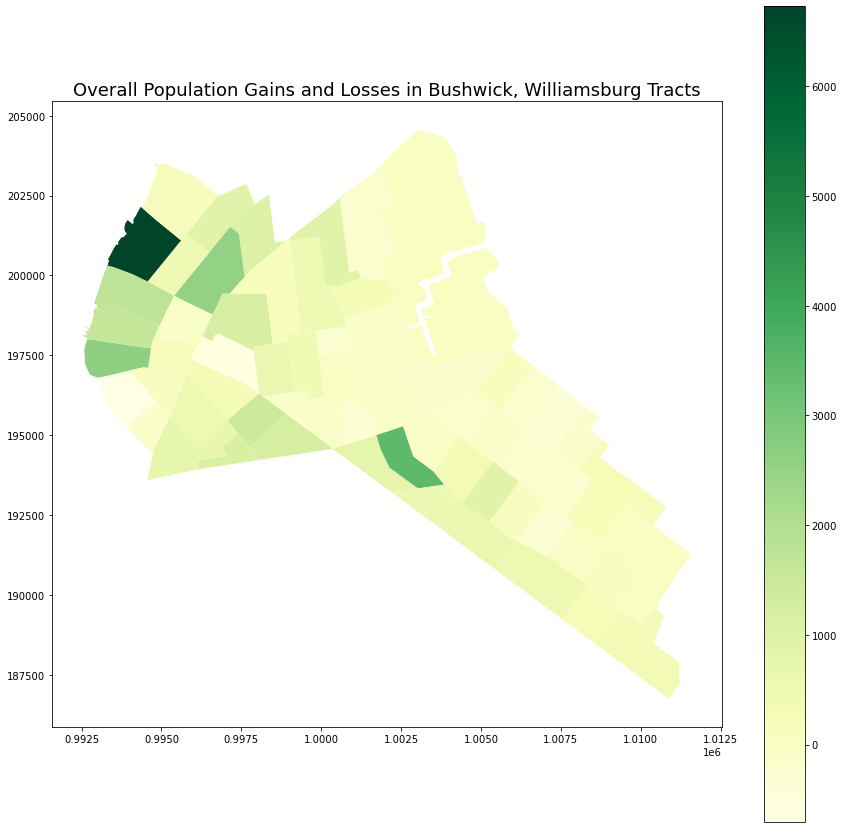

In [12]:
geo_bw.plot(column='Pop_Ch', figsize=(15,15), cmap='YlGn', legend=True)
plt.title('Overall Population Gains and Losses in Bushwick, Williamsburg Tracts', fontsize=18)
plt.show()

### The same tracts seeing drastic decreases in Hispanic/Latinx populations seem to have retained their overall population size, suggesting displacement.

In [13]:
top10_hsp_loss = geo_bw.nsmallest(10, 'Hsp_Ch')
top10_hsp_loss.shape

(10, 46)

In [14]:
topBW_hsp_loss = top10_hsp_loss[top10_hsp_loss['NTAName']=='Bushwick (West)']
print('Number of West Bushwick tracts in the top 10:',topBW_hsp_loss.shape[0])

Number of West Bushwick tracts in the top 10: 7


### 7 of the top 10 hispanic population-losing tracts in all of Brooklyn are in West Bushwick.
### Let's look at the ethnic, racial makeup of the population changes in those 7 tracts combined:

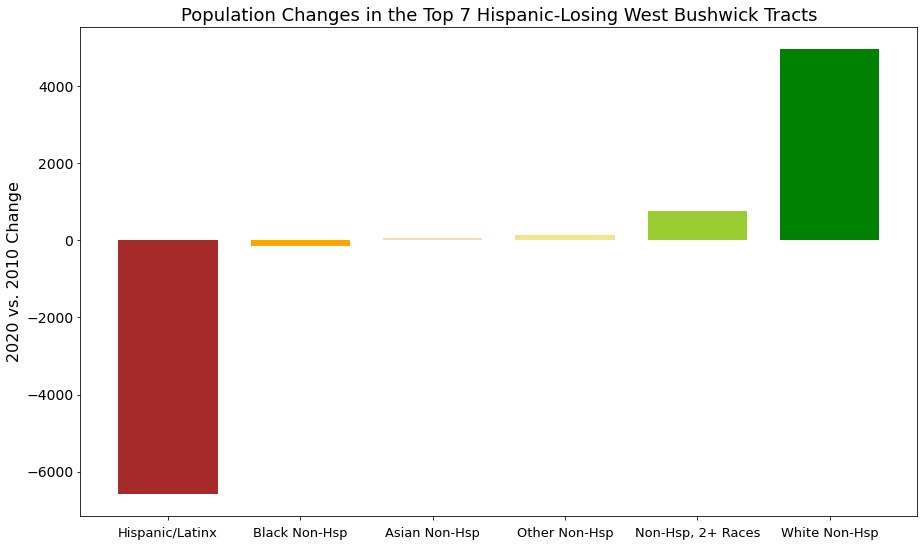

In [15]:
labels = 'Hispanic/Latinx', 'Black Non-Hsp', 'Asian Non-Hsp', 'Other Non-Hsp', 'Non-Hsp, 2+ Races', 'White Non-Hsp'
sizes = [topBW_hsp_loss['Hsp_Ch'].sum(), topBW_hsp_loss['BNH_Ch'].sum(),
         topBW_hsp_loss['ANH_Ch'].sum(),topBW_hsp_loss['ONH_Ch'].sum(),topBW_hsp_loss['NH2pl_Ch'].sum(),
         topBW_hsp_loss['WNH_Ch'].sum()]
colors = ['brown', 'orange', 'wheat', 'khaki', 'yellowgreen', 'green']
fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.bar(labels, sizes, width=0.75, color=colors)
ax1.xaxis.set_tick_params(pad=7)
plt.title('Population Changes in the Top 7 Hispanic-Losing West Bushwick Tracts',fontsize=18)
plt.ylabel('2020 vs. 2010 Change', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.show()

### Here we see that the Hispanic/Latinx community leaving these Bushwick tracts are being replaced by White Non-Hispanic people and people identifying as biracial or multiracial and non-hispanic.

### Let's inspect these changes in terms of percentage of their 2010 makeup of the population in these tracts:

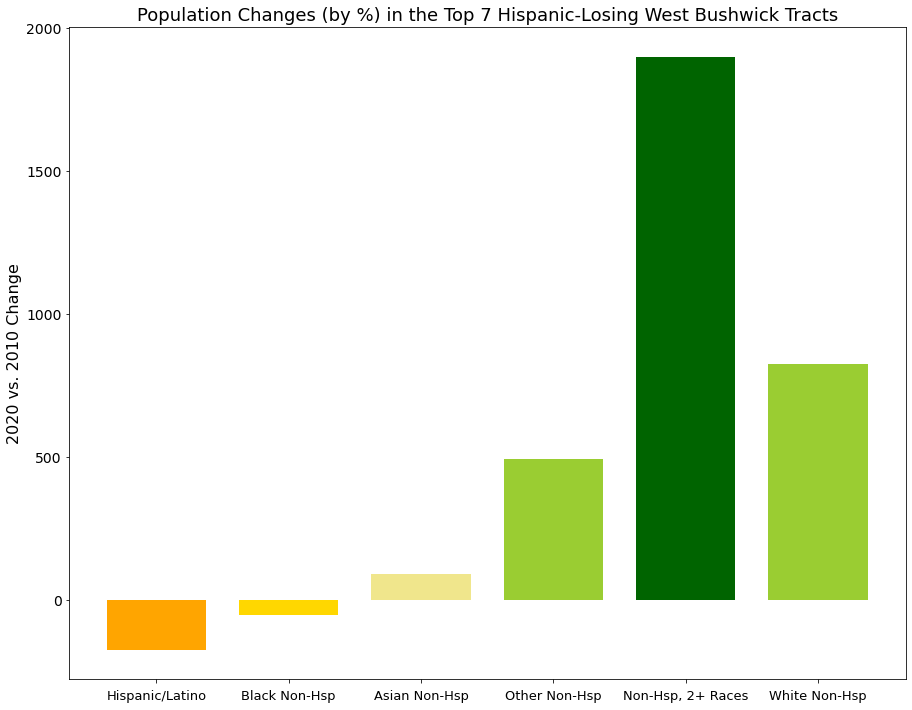

In [16]:
labels = 'Hispanic/Latino', 'Black Non-Hsp', 'Asian Non-Hsp', 'Other Non-Hsp', 'Non-Hsp, 2+ Races', 'White Non-Hsp'
sizes = [topBW_hsp_loss['Hsp_PCh'].sum(), topBW_hsp_loss['BNH_PCh'].sum(),
         topBW_hsp_loss['ANH_PCh'].sum(),topBW_hsp_loss['ONH_PCh'].sum(),topBW_hsp_loss['NH2pl_PCh'].sum(),
         topBW_hsp_loss['WNH_PCh'].sum()]
colors = ['orange', 'gold', 'khaki', 'yellowgreen', 'darkgreen', 'yellowgreen']
fig1, ax1 = plt.subplots(figsize=(15,12))
ax1.bar(labels, sizes, width=0.75, color=colors)
ax1.xaxis.set_tick_params(pad=7)
plt.title('Population Changes (by %) in the Top 7 Hispanic-Losing West Bushwick Tracts',fontsize=18)
plt.ylabel('2020 vs. 2010 Change', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.show()

In [17]:
pd.reset_option('max_columns')

# Findings:
While causation cannot be determined from this short inspection of Hispanic/Latinx displacement from Brooklyn tracts (specifically in West Bushwick), the 2020 Census seems to confirm what was already qualitatively quite visible; Hispanic/Latinx people are being displaced in large numbers from neighborhoods that they have called home for generations. It would be greatly interesting to dig deeper into understanding the causal dynamics of these population shifts and inspect the geographics and magnitude of other racial and ethnic groups' displacement in New York City.